## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Getting Data Set

In [2]:
df = pd.read_csv('merged_steam_data.csv')

df


,appid,name_x,price_x,ccu,type,name_y,required_age,is_free,controller_support,dlc,...,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,10,Counter-Strike,999.0,16360,game,Counter-Strike,0.0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 118156},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,220,Half-Life 2,999.0,1177,game,Half-Life 2,0.0,False,NaN,[323140],...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 904, 'name': 'Half-Life 2 Trailer', 't...",{'total': 103743},"{'total': 33, 'highlighted': [{'name': 'Defian...","{'coming_soon': False, 'date': '16 Nov, 2004'}","{'url': 'http://steamcommunity.com/app/220', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
2,240,Counter-Strike: Source,999.0,7752,game,Counter-Strike: Source,0.0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 87660},"{'total': 147, 'highlighted': [{'name': 'Someo...","{'coming_soon': False, 'date': '1 Nov, 2004'}","{'url': 'http://steamcommunity.com/app/240', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
3,550,Left 4 Dead 2,999.0,20328,game,Left 4 Dead 2,0.0,False,full,NaN,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 5952, 'name': 'Left 4 Dead - The Sacri...",{'total': 418847},"{'total': 101, 'highlighted': [{'name': 'CL0WN...","{'coming_soon': False, 'date': '16 Nov, 2009'}","{'url': 'http://steamcommunity.com/app/550', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Left 4 Dead 2 featur..."
4,620,Portal 2,199.0,2793,game,Portal 2,0.0,False,full,[323180],...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 81613, 'name': 'Portal 2 - Perpetual T...",{'total': 227268},"{'total': 51, 'highlighted': [{'name': 'Wake U...","{'coming_soon': False, 'date': '18 Apr, 2011'}","{'url': 'http://steamcommunity.com/app/620', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1593500,God of War,4999.0,12509,game,God of War,18,False,full,NaN,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 256864004, 'name': 'Features Trailer',...",{'total': 19841},"{'total': 37, 'highlighted': [{'name': 'Father...","{'coming_soon': False, 'date': '14 Jan, 2022'}",{'url': 'https://support.sms.playstation.com/h...,https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Gameplay consists of..."
335,1677740,Stumble Guys,799.0,4423,game,Stumble Guys,0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 16, 'path_thumbnail': 'https://cdn.aka...","[{'id': 256856802, 'name': 'Stumble Guys out o...",{'total': 1046},NaN,"{'coming_soon': False, 'date': '7 Oct, 2021'}","{'url': '', 'email': 'support@kitkagames.com'}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
336,1794680,Vampire Survivors,299.0,52451,game,Vampire Survivors,0.0,False,full,NaN,...,"[{'id': 2, 'description': 'Single-pla

## Data Processing for New Table for KNN use

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("merged_steam_data.csv")

print("Column names:")
print(df.columns.tolist())

print("\nFirst row:")
print(df.iloc[0])

df = df.drop(columns=['legal_notice', 'demos', 'drm_notice', 'ext_user_account_notice', 'fullgame', 'controller_support', 'detailed_description', 'about_the_game', 'short_description', 'package_groups', 'metacritic', 'reviews', 'screenshots', 'movies', 'recommendations', 'achievements', 'support_info', 'background', 'content_descriptors', 'type', 'is_free', 'release_date', 'platforms', 'required_age', 'categories', 'genres', 'dlc', 'mac_requirements', 'linux_requirements', 'pc_requirements', 'developers', 'publishers', 'header_image', 'website', 'release_date', 'supported_languages', 'price_y', 'packages'])
df = df.drop(columns=['name_y'])
df = df.drop(columns=['name_x'])
df['game_id'] = df.index
df

Column names:
['appid', 'name_x', 'price_x', 'ccu', 'type', 'name_y', 'required_age', 'is_free', 'controller_support', 'dlc', 'detailed_description', 'about_the_game', 'short_description', 'fullgame', 'supported_languages', 'header_image', 'website', 'pc_requirements', 'mac_requirements', 'linux_requirements', 'legal_notice', 'drm_notice', 'ext_user_account_notice', 'developers', 'publishers', 'demos', 'price_y', 'packages', 'package_groups', 'platforms', 'metacritic', 'reviews', 'categories', 'genres', 'screenshots', 'movies', 'recommendations', 'achievements', 'release_date', 'support_info', 'background', 'content_descriptors']

First row:
appid                                                                                                                                                                                                                                                                                                                                                         

,appid,price_x,ccu,game_id
0,10,999.0,16360,0
1,220,999.0,1177,1
2,240,999.0,7752,2
3,550,999.0,20328,3
4,620,199.0,2793,4
...,...,...,...,...
334,1593500,4999.0,12509,334
335,1677740,799.0,4423,335
336,1794680,299.0,52451,336
337,1832640,199.0,3505,337


## Data Processing with Graph

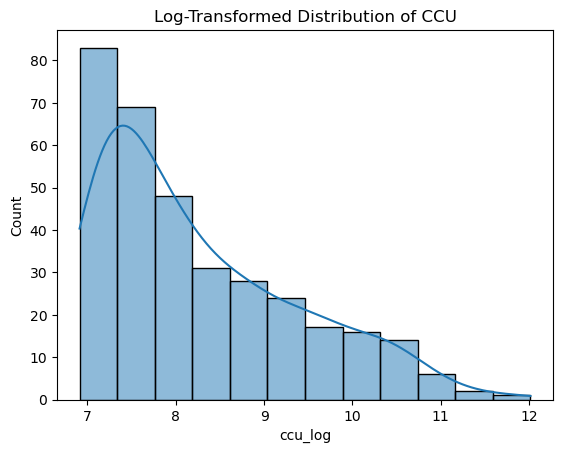

In [10]:
# Convert 'price_x' and 'ccu' columns to numeric types, coercing errors to NaN
df['price_x'] = pd.to_numeric(df['price_x'], errors='coerce')
df['ccu'] = pd.to_numeric(df['ccu'], errors='coerce')

# Drop rows with missing values in 'price_x' or 'ccu'
df.dropna(subset=['price_x', 'ccu'], inplace=True)

# Remove duplicate entries based on 'appid'
df = df.drop_duplicates(subset=['appid'])

# Apply log transformation to 'ccu' to normalize its distribution
df['ccu_log'] = np.log1p(df['ccu'])

# Visualize the distribution of the log-transformed target variable
sns.histplot(df['ccu_log'], kde=True)
plt.title('Log-Transformed Distribution of CCU')
plt.show()

# Define features (drop original 'ccu' and log-transformed target from features)
X = df.drop(columns=['ccu', 'ccu_log'])

# Define the target variable
y = df['ccu_log']

# Standard scale the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Hyperparameter Tuning + Graph Results

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.2763
Mean Squared Error: 0.30283765042094185
R^2 Score: 0.7495587879772982


c:\Users\Anthony\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


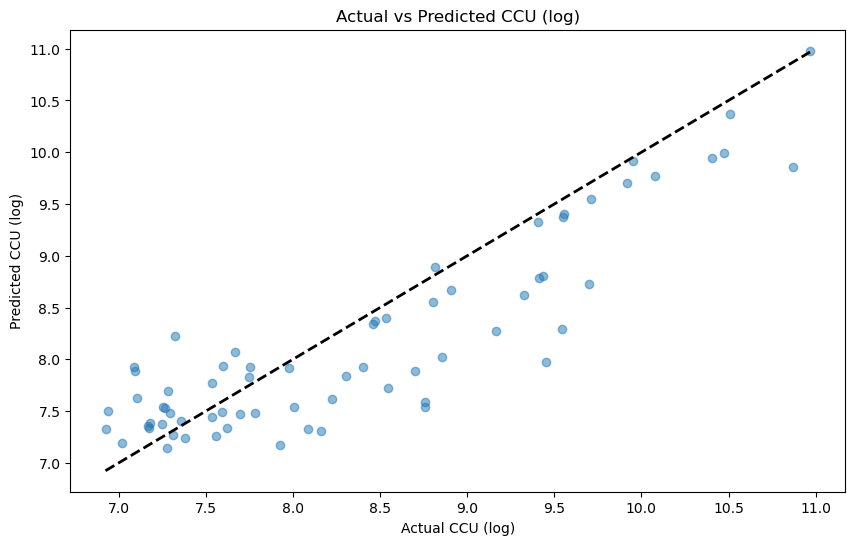

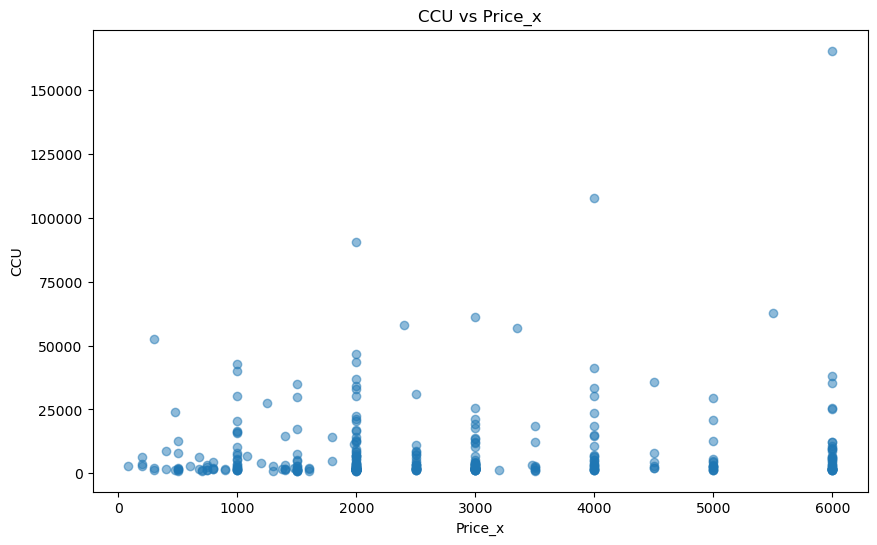

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


# Define KNN model
knn = KNeighborsRegressor()

# Define the hyperparameter grid (expanded range for tuning)
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],  # Explore more neighbor values
    'weights': ['uniform', 'distance'],    # Explore weight functions
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Different algorithms for KNN
    'leaf_size': [10, 20, 30, 40],  # Range of leaf sizes
}

# Set up GridSearchCV with 5-fold cross-validation and negative MSE scoring
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print best hyperparameters and best score
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {-grid_search.best_score_:.4f}")

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual CCU (log)')
plt.ylabel('Predicted CCU (log)')
plt.title('Actual vs Predicted CCU (log)')
plt.show()

# Optionally, plot CCU vs price_x to see if there's any obvious pattern
plt.figure(figsize=(10, 6))
plt.scatter(df['price_x'], df['ccu'], alpha=0.5)
plt.xlabel('Price_x')
plt.ylabel('CCU')
plt.title('CCU vs Price_x')
plt.show()
